# Klasifikasi Support Vector Machine (SVM)

## Import module / package

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import svm
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv("data/tweets_labelled_tokenized_nltk.csv")
# df = pd.read_csv(r"data/tweets_labelled_tokenized_sastrawi.csv")
# df2 = pd.read_csv(r"data/tweets_labelled_tokenized_ecs.csv")
df.head()

,tweet,sentimen
0,"['menangani', 'kekerasan', 'seksual', 'disahka...",Positif
1,"['menangani', 'kekerasan', 'seksual', 'disahka...",Positif
2,"['wakil', 'mpr', 'ri', 'mahasiswa', 'kawal', '...",Negatif
3,"['fadel', 'muhammad', 'mahasiswa', 'kawal', 'i...",Negatif
4,"['tanggal', 'chatnya', 'april', 'dijerat']",Negatif


In [3]:
# df2.head()

In [4]:
def merge_neutral(text):
    if text == "Netral":
        return "Positif"
    if text == "Positif":
        return "Positif"
    else:
        return "Negatif"

df['sentimen'] = df['sentimen'].apply(merge_neutral)
df

,tweet,sentimen
0,"['menangani', 'kekerasan', 'seksual', 'disahka...",Positif
1,"['menangani', 'kekerasan', 'seksual', 'disahka...",Positif
2,"['wakil', 'mpr', 'ri', 'mahasiswa', 'kawal', '...",Negatif
3,"['fadel', 'muhammad', 'mahasiswa', 'kawal', 'i...",Negatif
4,"['tanggal', 'chatnya', 'april', 'dijerat']",Negatif
...,...,...
15627,"['koordinator', 'forum', 'perempuan', 'indones...",Positif
15628,"['dinilai', 'penuhi', 'harapan', 'kaum', 'pere...",Positif
15629,"['keberadaan', 'payung', 'hukum', 'merehabilit...",Positif
15630,"['menyebut', 'kehadiran', 'wujud', 'keberpihak...",Positif


## Split Data (Test & Train)

In [5]:
train_X_df, test_X_df, train_Y_df, test_Y_df = model_selection.train_test_split(df['tweet']
                                                                                , df['sentimen']
                                                                                , test_size = 0.1
                                                                                , random_state = 42
                                                                                , stratify=df['sentimen'])

In [6]:
data_train = pd.DataFrame()
data_train['tweet'] = train_X_df
data_train['sentimen'] = train_Y_df

data_test = pd.DataFrame()
data_test['tweet'] = test_X_df
data_test['sentimen'] = test_Y_df

# data_train_2 = pd.DataFrame()
# data_train_2['tweet'] = train_X_df2
# data_train['sentimen'] = train_Y_df2

# data_test_2 = pd.DataFrame()
# data_test_2['tweet'] = test_X_df2
# data_test_2['sentimen'] = test_Y_df2

In [7]:
data_train.to_csv(r"data/temp/df_trainsvm.csv")
data_test.to_csv(r"data/temp/df_testsvm.csv")

## TF-IDF

In [8]:
datatfidf = TfidfVectorizer()
datatfidf.fit(df['tweet'].values.astype('U'))
train_X_datatfidf = datatfidf.transform(data_train['tweet'].values.astype('U'))
test_X_datatfidf = datatfidf.transform(data_test['tweet'].values.astype('U'))

# datatfidf2 = TfidfVectorizer(max_features = 5000)
# datatfidf2.fit(df2['tweet'].values.astype('U'))
# train_X_datatfidf2 = datatfidf2.transform(data_train_2['tweet'].values.astype('U'))
# test_X_datatfidf2 = datatfidf2.transform(data_test_2['tweet'].values.astype('U'))

In [9]:
# datatfidf2

In [10]:
# print(test_X_datatfidf)

In [11]:
# print(test_X_datatfidf2)

In [12]:
# print(train_X_datatfidf)

In [13]:
# print(train_X_datatfidf2)

In [14]:
print(test_X_datatfidf.shape)
print(train_X_datatfidf.shape)
# print(test_X_datatfidf2.shape)
# print(train_X_datatfidf2.shape)

(1564, 11156)
(14068, 11156)


## Klasifikasi SVM (Kernel Linear)

In [15]:
from sklearn.svm import SVC

model = SVC(kernel='linear')
# model2 = SVC(kernel='linear')
model.fit(train_X_datatfidf,train_Y_df)
# model2.fit(train_X_datatfidf2,train_Y_df2)

SVC(kernel='linear')

In [16]:
from sklearn.metrics import accuracy_score

predictionsSVM = model.predict(test_X_datatfidf)

test_prediction = pd.DataFrame()
test_prediction['tweet'] = test_X_df
test_prediction['sentimen'] = predictionsSVM

SVMaccuracy = accuracy_score(predictionsSVM, test_Y_df)*100
SVMaccuracy = round(SVMaccuracy,1)

## Mengecek Akurasi

### K-Fold Cross Validation (10 Fold)

In [17]:
train_Y_df_cross = train_Y_df.replace("Positif",1).replace("Negatif",0)

from sklearn.model_selection import cross_val_score
print("Akurasi K-Fold Cross Validation : "+str(cross_val_score(model, train_X_datatfidf, train_Y_df_cross, cv=10, n_jobs=6, scoring="accuracy").mean()*100)+" %")

Akurasi K-Fold Cross Validation : 93.17597644777533 %


### Dataset DF (_Stemming Nazief_)

In [18]:
print("Akurasi SVM : ",SVMaccuracy, "%")

Akurasi SVM :  93.9 %


In [19]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("Support Vector Machine Acuracy:", accuracy_score(test_Y_df, predictionsSVM)*100, "%")
print("Support Vector Machine Precision:", precision_score(test_Y_df, predictionsSVM, average="binary",
                                                           pos_label="Positif")*100, "%")
print("Support Vector Machine Recall:", recall_score(test_Y_df, predictionsSVM, average="binary",
                                                     pos_label="Positif")*100, "%")
print("Support Vector Machine f1_score:", f1_score(test_Y_df, predictionsSVM, average="binary",
                                                   pos_label="Positif")*100, "%")
print('====================================================\n')
print (classification_report(test_Y_df, predictionsSVM))

Support Vector Machine Acuracy: 93.86189258312021 %
Support Vector Machine Precision: 94.67084639498434 %
Support Vector Machine Recall: 97.73462783171522 %
Support Vector Machine f1_score: 96.17834394904459 %

              precision    recall  f1-score   support

     Negatif       0.90      0.79      0.84       328
     Positif       0.95      0.98      0.96      1236

    accuracy                           0.94      1564
   macro avg       0.92      0.89      0.90      1564
weighted avg       0.94      0.94      0.94      1564



Support Vector Machine Acuracy: 93.9 %


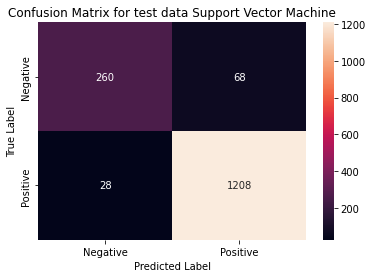

In [20]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

print("Support Vector Machine Acuracy:", SVMaccuracy, "%")

conf_mat = confusion_matrix(test_Y_df, predictionsSVM)
class_label = ["Negative","Positive"]
test =pd.DataFrame(conf_mat, index = class_label, columns = class_label)
sns.heatmap(test, annot = True, fmt = "d")
plt.title("Confusion Matrix for test data Support Vector Machine")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

### Dataset DF2 (_Stemming ECS_)

In [21]:
# print("Akurasi SVM : ",SVMaccuracy2, "%")

In [22]:
# from sklearn.metrics import classification_report
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# print("Support Vector Machine Acuracy:", accuracy_score(test_Y_df2, predictionsSVM2)*100, "%")
# print("Support Vector Machine Precision:", precision_score(test_Y_df2, predictionsSVM2, average="binary", pos_label="Positif")*100, "%")
# print("Support Vector Machine Recall:", recall_score(test_Y_df2, predictionsSVM2, average="binary", pos_label="Positif")*100, "%")
# print("Support Vector Machine f1_score:", f1_score(test_Y_df2, predictionsSVM2, average="binary", pos_label="Positif")*100, "%")
# print('====================================================\n')
# print (classification_report(test_Y_df2, predictionsSVM))

In [23]:
# from sklearn.metrics import confusion_matrix
# import seaborn as sns

# print("Support Vector Machine Acuracy:", SVMaccuracy, "%")

# conf_mat = confusion_matrix(test_Y_df2, predictionsSVM2)
# class_label = ["Negative","Positive"]
# test =pd.DataFrame(conf_mat, index = class_label, columns = class_label)
# sns.heatmap(test, annot = True, fmt = "d")
# plt.title("Confusion Matrix for test data Support Vector Machine")
# plt.xlabel("Predicted Label")
# plt.ylabel("True Label")
# plt.show()

## Klasifikasi SVM (Kernel RBF)

In [24]:
from sklearn.svm import SVC
model_rbf = SVC(random_state=42, kernel='rbf')
# model2_rbf = SVC(random_state=42, kernel='rbf')
model_rbf.fit(train_X_datatfidf,train_Y_df)
# model2_rbf.fit(train_X_datatfidf2,train_Y_df2)

SVC(random_state=42)

In [25]:
from sklearn.metrics import accuracy_score

predictionsSVM_rbf = model_rbf.predict(test_X_datatfidf)

test_prediction_rbf = pd.DataFrame()
test_prediction_rbf['tweet'] = test_X_df
test_prediction_rbf['sentimen'] = predictionsSVM_rbf

SVMaccuracy_rbf = accuracy_score(predictionsSVM_rbf, test_Y_df)*100
SVMaccuracy_rbf = round(SVMaccuracy_rbf,1)

## Mengecek Akurasi

### Dataset DF (_Stemming Nazief_)

In [26]:
print("Akurasi SVM RBF DF : ",SVMaccuracy_rbf, "%")

Akurasi SVM RBF DF :  92.7 %


In [27]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("SVM RBF Acuracy:", accuracy_score(test_Y_df, predictionsSVM_rbf)*100, "%")
print("SVM RBF Precision:", precision_score(test_Y_df, predictionsSVM_rbf, average="binary",
                                               pos_label="Positif")*100, "%")
print("SVM RBF Recall:", recall_score(test_Y_df, predictionsSVM_rbf, average="binary",
                                         pos_label="Positif")*100, "%")
print("SVM RBF f1_score:", f1_score(test_Y_df, predictionsSVM_rbf, average="binary", 
                                       pos_label="Positif")*100, "%")
print('====================================================\n')
print (classification_report(test_Y_df, predictionsSVM_rbf))

SVM RBF Acuracy: 92.71099744245525 %
SVM RBF Precision: 93.35394126738794 %
SVM RBF Recall: 97.73462783171522 %
SVM RBF f1_score: 95.49407114624506 %

              precision    recall  f1-score   support

     Negatif       0.90      0.74      0.81       328
     Positif       0.93      0.98      0.95      1236

    accuracy                           0.93      1564
   macro avg       0.91      0.86      0.88      1564
weighted avg       0.93      0.93      0.92      1564



Support Vector Machine Acuracy: 92.7 %


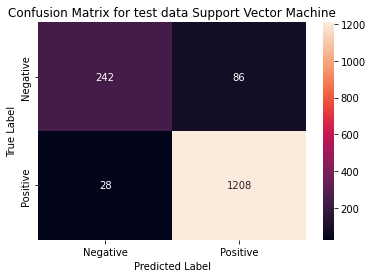

In [28]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

print("Support Vector Machine Acuracy:", SVMaccuracy_rbf, "%")

conf_mat = confusion_matrix(test_Y_df, predictionsSVM_rbf)
class_label = ["Negative","Positive"]
test =pd.DataFrame(conf_mat, index = class_label, columns = class_label)
sns.heatmap(test, annot = True, fmt = "d")
plt.title("Confusion Matrix for test data Support Vector Machine")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

### Dataset DF2 (_Stemming ECS_)

In [29]:
# print("Akurasi SVM RBF DF2 : ",SVMaccuracy2_rbf, "%")

In [30]:
# from sklearn.metrics import classification_report
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# print("SVM RBF DF2 Acuracy:", accuracy_score(test_Y_df2, predictionsSVM2_rbf)*100, "%")
# print("SVM RBF DF2 Precision:", precision_score(test_Y_df2, predictionsSVM2_rbf, average="binary", pos_label="Positif")*100, "%")
# print("SVM RBF DF2 Recall:", recall_score(test_Y_df2, predictionsSVM2_rbf, average="binary", pos_label="Positif")*100, "%")
# print("SVM RBF DF2 f1_score:", f1_score(test_Y_df2, predictionsSVM2_rbf, average="binary", pos_label="Positif")*100, "%")
# print('====================================================\n')
# print (classification_report(test_Y_df2, predictionsSVM_rbf))

In [31]:
# from sklearn.metrics import confusion_matrix
# import seaborn as sns

# print("Support Vector Machine Acuracy:", SVMaccuracy2_rbf, "%")

# conf_mat = confusion_matrix(test_Y_df2, predictionsSVM2_rbf)
# class_label = ["Negative","Positive"]
# test =pd.DataFrame(conf_mat, index = class_label, columns = class_label)
# sns.heatmap(test, annot = True, fmt = "d")
# plt.title("Confusion Matrix for test data Support Vector Machine")
# plt.xlabel("Predicted Label")
# plt.ylabel("True Label")
# plt.show()

In [32]:
train_Y_df_bin = train_Y_df.replace("Negatif", 0).replace("Positif", 1)

## K-Fold Cross Validation (SVM Kernel Linear)

In [33]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, train_X_datatfidf, train_Y_df_bin, cv = 50, scoring='accuracy', n_jobs=12)
scores
print("Akurasi SVM Kernel Linear Menggunakan K-Fold Cross Validation : "+str(scores.mean()*100)+" %")

Akurasi SVM Kernel Linear Menggunakan K-Fold Cross Validation : 93.2615532167285 %


## K-Fold Cross Validation (SVM Kernel RBF)

In [34]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model_rbf, train_X_datatfidf, train_Y_df_bin, cv = 50, scoring='accuracy', n_jobs=12)
scores
print("Akurasi SVM Kernel Linear Menggunakan K-Fold Cross Validation : "+str(scores.mean()*100)+" %")

Akurasi SVM Kernel Linear Menggunakan K-Fold Cross Validation : 92.3085232578683 %
